Import the required libraries we need for the lab.

In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

In [ ]:
Add your code below following the instructions given in the course to complete the peer graded assignment

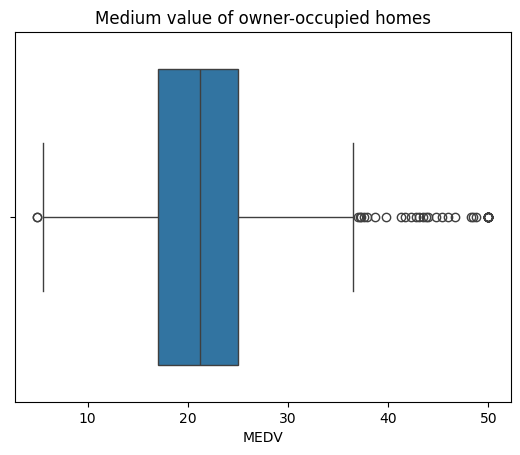

In [9]:
ax=sns.boxplot(data=boston_df,x='MEDV').set_title('Medium value of owner-occupied homes')

In [ ]:
The distribution is skewed to the right. We can see this from the longer whisker on the right side and the outliers extending further to the right.
The median value appears to be around 20. This is represented by the line inside the box.
The IQR, which represents the middle 50% of the data, is relatively narrow. It spans from approximately 18 to 22.
There are several outliers on the right side of the plot. These are data points that fall outside the expected range based on the IQR.
Interpretation
The median home value is around 20. The middle 50% of homes have values within a narrow range of 18 to 22. There is a significant portion of homes with values higher than the median, as indicated by the right-skewed distribution and the presence of outliers. The outliers suggest that there are some homes with exceptionally high values compared to the majority.

[Text(0.5, 1.0, 'Bar Plot of Charles River')]

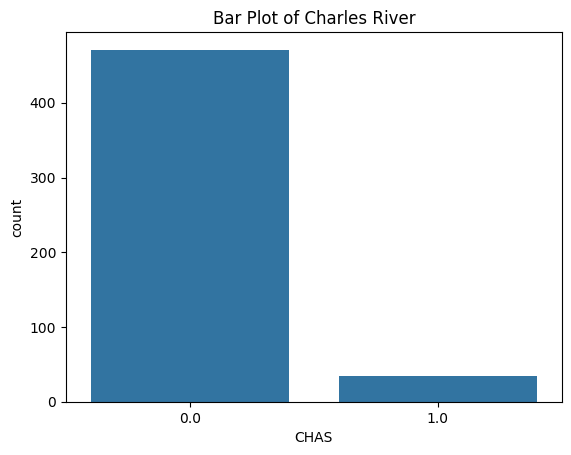

In [10]:
sns.countplot(x='CHAS', data=boston_df).set(title='Bar Plot of Charles River')

In [ ]:
The plot shows the distribution of a binary variable, likely representing whether a property is located near the Charles River (1) or not (0).

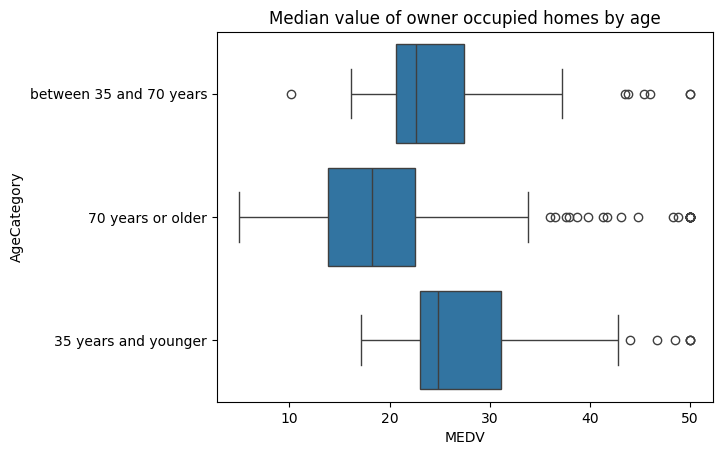

In [11]:
def SetAgeCat(row):

    if row['AGE'] < 35:
        return '35 years and younger'
    if row['AGE'] < 70:
        return 'between 35 and 70 years'
    else:
        return '70 years or older'

boston_df['AgeCategory'] = boston_df.apply(SetAgeCat,axis=1)

ax=sns.boxplot(data=boston_df,x='MEDV',y='AgeCategory').set_title('Median value of owner occupied homes by age')

In [ ]:
The median MEDV for the "35 and younger" group appears to be higher than the other two groups.
The median for the "36 to 70" group seems slightly lower than the "35 and younger" group.
The "70 and older" group has the lowest median MEDV.

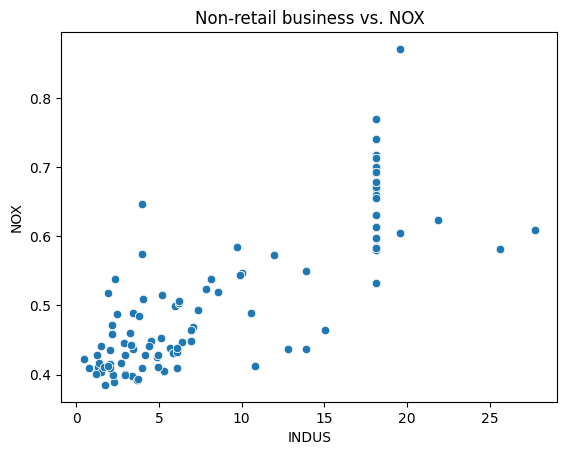

In [12]:
ax = sns.scatterplot(x='INDUS',y='NOX',data=boston_df).set_title('Non-retail business vs. NOX')

In [ ]:
There appears to be a positive correlation between Nitric Oxide concentration and the proportion of non-retail business acres per town. This means that as the proportion of non-retail business acres increases, the Nitric Oxide concentration tends to increase as well.

[Text(0.5, 1.0, 'Histogram of Pupil to Teacher Ratio')]

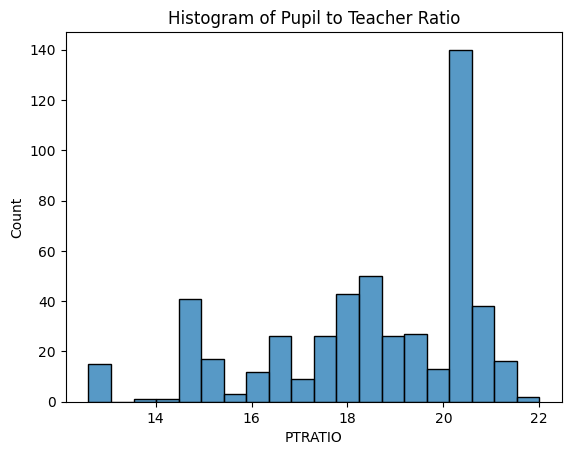

In [13]:
sns.histplot(boston_df['PTRATIO'], kde=False, bins=20).set(title='Histogram of Pupil to Teacher Ratio')

In [ ]:
The distribution of PTRATIO appears to be right-skewed. There are more data points towards the lower end of the range (around 14-18) and fewer towards the higher end (around 20-22).
The distribution has a peak around the value of 20. This suggests that a large number of schools have a PTRATIO close to 20.

In [14]:
# Hypothesis - There is significant different between MEDV of houses
# close to the Charles River compared to those further away
# The NULL hypothesis is that there is no link

scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                    boston_df[boston_df['CHAS']==1]['MEDV'],
                   center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                    boston_df[boston_df['CHAS']==1]['MEDV'],
                   equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [16]:
X = boston_df['DIS']
X=sm.add_constant(X)
Y = boston_df['MEDV']

model = sm.OLS(Y,X,).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        23:06:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""